Resolvendo os exercicios da lista!

In [6]:
import numpy as np
import matplotlib.pyplot as plt

ltura: 443

largura: 663

tipo de dados: float32

posto: 373


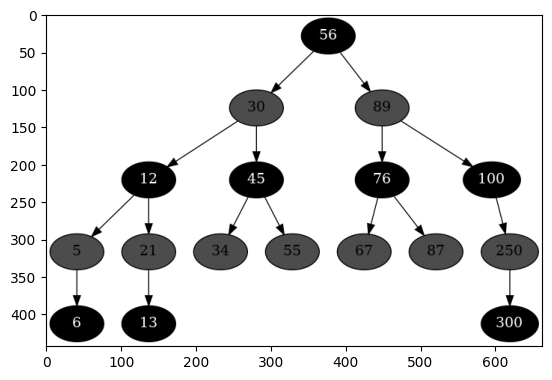

In [7]:
img_colorida = plt.imread("arv.png")
array_colorido = np.array(img_colorida)

R = array_colorido[:, :, 0]
G = array_colorido[:, :, 1]
B = array_colorido[:, :, 2]

img_cinza = 0.299 * R + 0.587 * G + 0.114 * B

print (f"\altura: {img_cinza.shape[0]}")
print(f"\nlargura: {img_cinza.shape[1]}")
print (f"\ntipo de dados: {img_cinza.dtype}")
print(f"\nposto: {np.linalg.matrix_rank(img_cinza)}")

plt.imshow(img_cinza, cmap="gray")


Exercicio 2


Erro de Frobenius (metodo direto): 148.0911102294922

Erro de Frobenius (metodo teorico): 148.0911865234375

São próximos os erros

Erro de Frobenius (metodo direto): 79.06000518798828

Erro de Frobenius (metodo teorico): 79.06002044677734

São próximos os erros

Erro de Frobenius (metodo direto): 58.18184280395508

Erro de Frobenius (metodo teorico): 58.181888580322266

São próximos os erros

Erro de Frobenius (metodo direto): 43.08989715576172

Erro de Frobenius (metodo teorico): 43.08990478515625

São próximos os erros

Erro de Frobenius (metodo direto): 27.499658584594727

Erro de Frobenius (metodo teorico): 27.499671936035156

São próximos os erros

Erro de Frobenius (metodo direto): 17.042274475097656

Erro de Frobenius (metodo teorico): 17.04229736328125

São próximos os erros


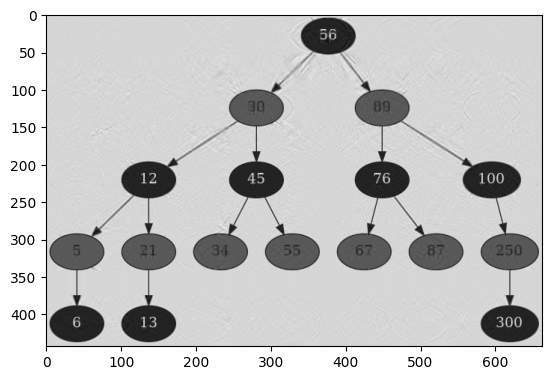

In [8]:

def aproximacao_posto_r(imagem, r):
    U, S, Vt = np.linalg.svd(img_cinza, full_matrices=True)
    #    print (f"\nU: {U}")
    #    print (f"\nS: {S}")
    #    print (f"\nVt: {Vt}")

    if r > S.shape[0]:
        r = S.shape[0]


    Ur = U[:, :r]
    Sr = S[:r]
    Vtr = Vt[:r, :]

    Img_reconstruida_com_posto_r = Ur @ np.diag(Sr) @ Vtr

    plt.imshow(Img_reconstruida_com_posto_r, cmap="gray")

    # erro de Frobenius:
    erro_f = np.linalg.norm(img_cinza - Img_reconstruida_com_posto_r)
    print (f"\nErro de Frobenius (metodo direto): {erro_f}")

    # pega os valores de r+1 até o final
    restante_dos_valor = S[r:]
    restante_dos_valor = restante_dos_valor ** 2
    restante_dos_valor = np.sum(restante_dos_valor)
    erro_f2 = np.sqrt(restante_dos_valor)

    print (f"\nErro de Frobenius (metodo teorico): {erro_f2}")

    if np.allclose(erro_f, erro_f2):
        print ("\nSão próximos os erros")

    return Img_reconstruida_com_posto_r

for i in [1, 5, 10, 20, 50, 100]:
    aproximacao_posto_r(img_cinza, i)


Exercicio 3


Erro de Frobenius (metodo direto): 148.0911102294922

Erro de Frobenius (metodo teorico): 148.0911865234375

São próximos os erros

Erro de Frobenius (metodo direto): 79.06000518798828

Erro de Frobenius (metodo teorico): 79.06002044677734

São próximos os erros

Erro de Frobenius (metodo direto): 58.18184280395508

Erro de Frobenius (metodo teorico): 58.181888580322266

São próximos os erros

Erro de Frobenius (metodo direto): 39.05401611328125

Erro de Frobenius (metodo teorico): 39.054039001464844

São próximos os erros

Erro de Frobenius (metodo direto): 27.499658584594727

Erro de Frobenius (metodo teorico): 27.499671936035156

São próximos os erros

Erro de Frobenius (metodo direto): 17.042274475097656

Erro de Frobenius (metodo teorico): 17.04229736328125

São próximos os erros


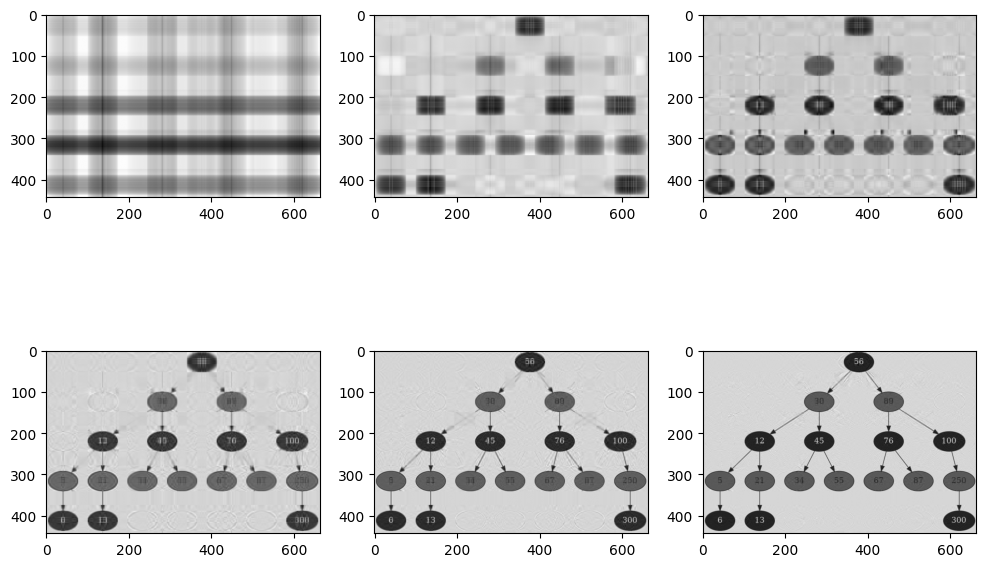

In [9]:
#   REVER DE COLOCAR OS TITULOS NESSE EXERCICIO
#
#

r = [1, 5, 10, 25, 50, 100]

U, S, Vt = np.linalg.svd(img_cinza, full_matrices=True)

i = 0

imagens = []

fig, axes = plt.subplots(2, 3, figsize=(12, 8))


rec1 = aproximacao_posto_r(img_cinza, 1)
rec2 = aproximacao_posto_r(img_cinza, 5)
rec3 = aproximacao_posto_r(img_cinza, 10)
rec4 = aproximacao_posto_r(img_cinza, 25)
rec5 = aproximacao_posto_r(img_cinza, 50)
rec6 = aproximacao_posto_r(img_cinza, 100) 

axes[0, 0].imshow(rec1, cmap="gray")
axes[0, 1].imshow(rec2, cmap="gray")
axes[0, 2].imshow(rec3, cmap="gray")
axes[1, 0].imshow(rec4, cmap="gray")
axes[1, 1].imshow(rec5, cmap="gray")
axes[1, 2].imshow(rec6, cmap="gray")








Exercicio 4

IndexError: index 3 is out of bounds for axis 0 with size 3

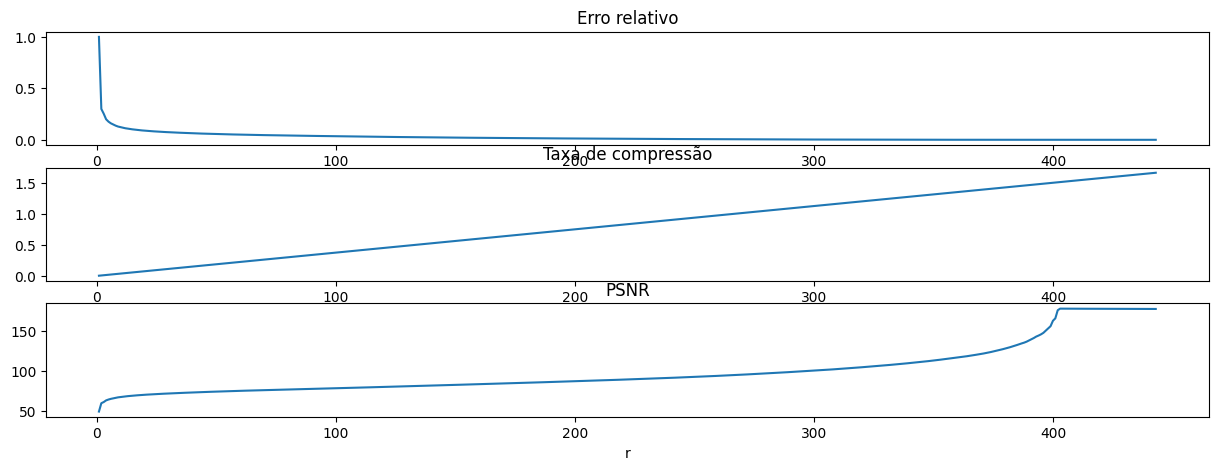

In [10]:
def analisar_compressao(imagem):
    U, S, Vt = np.linalg.svd(imagem, full_matrices=False)

    taxa_de_compressao = []
    erro_relativo = []
    PSNR = []
    norma_img = np.linalg.norm(imagem)


    m, n = imagem.shape
    mn = n * m
    mn1 = m + n + 1

    for r in range (S.shape[0]):
        rec = U[:, :r] @ np.diag(S[:r]) @ Vt[:r]

        taxa_de_compressao.append((r*(mn1)) / (mn))

        erro = np.sqrt((S[r:] ** 2).sum())
        erro_relativo.append(erro / norma_img)

        rmse = np.sqrt(((imagem - rec) ** 2).mean())
        PSNR.append(20 * np.log10(255. / rmse))


    fig, ax = plt.subplots(3, 1, figsize=(15, 5))

    r = np.arange(S.shape[0]) + 1

    ax[0].plot(r, erro_relativo)
    ax[0].set_title("Erro relativo")
    ax[0].set_xlabel('r')

    ax[1].plot(r, taxa_de_compressao)
    ax[1].set_title("Taxa de compressão")
    ax[1].set_xlabel('r')
    
    ax[2].plot(r, PSNR)
    ax[2].set_title("PSNR")
    ax[2].set_xlabel('r')


    ax[3].plot(taxa_de_compressao, PSNR)
    ax[3].set_title("Compressão x PSNR")
    ax[3].set_xlabel('r')


analisar_compressao(img_cinza)

